In [24]:
import requests
from skimage.io import imread
from PIL import Image
from utils import pil_to_base64, base64_to_pil

In [9]:
# send image to server
url = 'http://127.0.0.1:5000/upload'
file = {'image': open('/home/pico/code/BSR-33/computer_vision_pytorch/name.jpg', 'rb')}
response = requests.post(url, files=file)
print(response.text)

Image received


In [8]:
#get image from server
im = Image.fromarray(imread('http://127.0.0.1:5000/download'))
type(im)

PIL.Image.Image

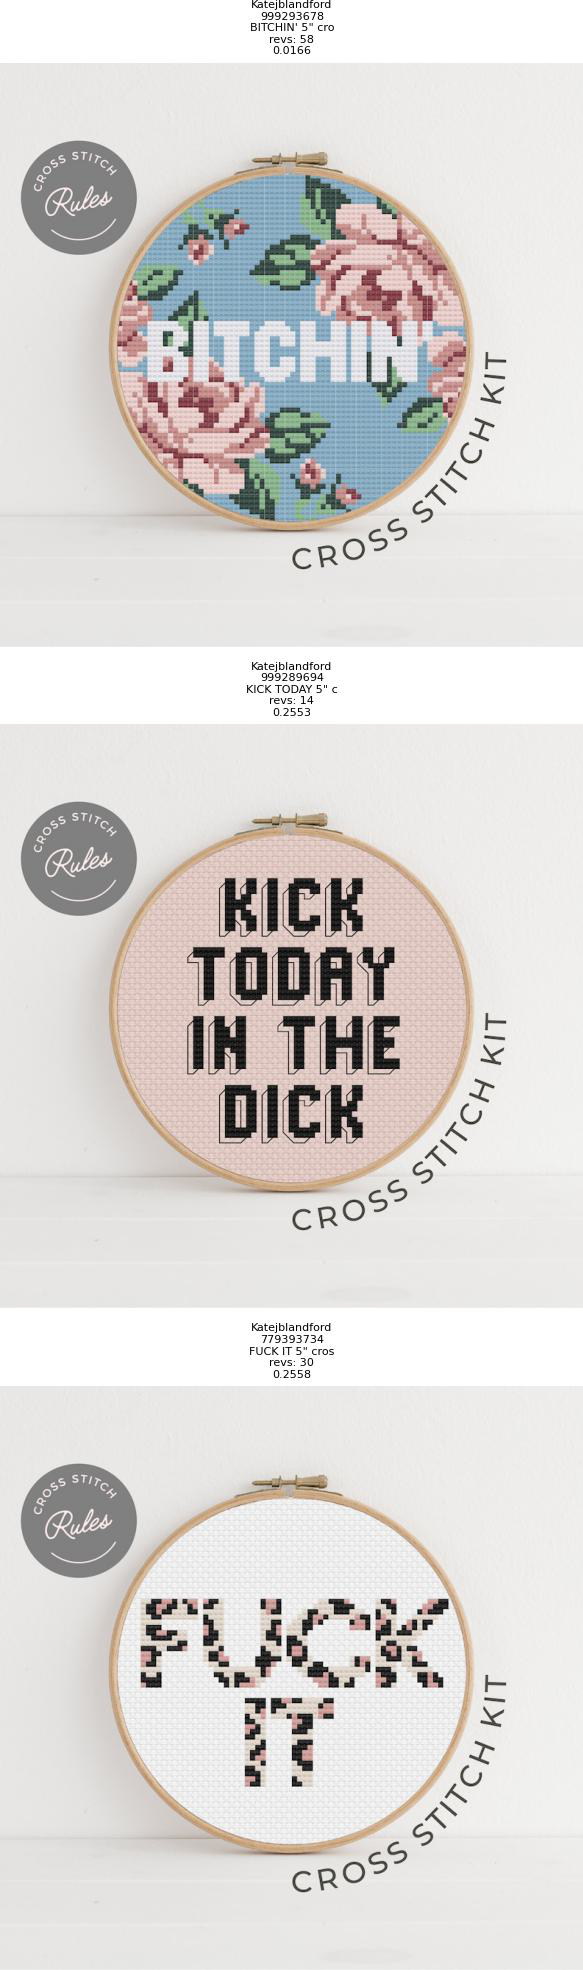

In [29]:
import requests
import cv2
import numpy as np
from PIL import Image
import io
import base64

url = 'http://127.0.0.1:5000/similar_im2im_all'

# read the image file
#image = cv2.imread('/vol/fob-vol6/mi13/pivillaa/code/stitches_workspace/stitches_datasets/stitches_images/ZanderPrint_1239760257.jpg')
image = Image.open('/vol/fob-vol6/mi13/pivillaa/code/stitches_workspace/stitches_datasets/stitches_images/Katejblandford_999293678.jpg')

img_str = pil_to_base64(image)

# send the image to the server
payload = {"image": img_str}
response = requests.post(url, json=payload)

# Get the base64 encoded image data from the request
img_str = response.json()['processed_image']
r_im = base64_to_pil(img_str)
r_im

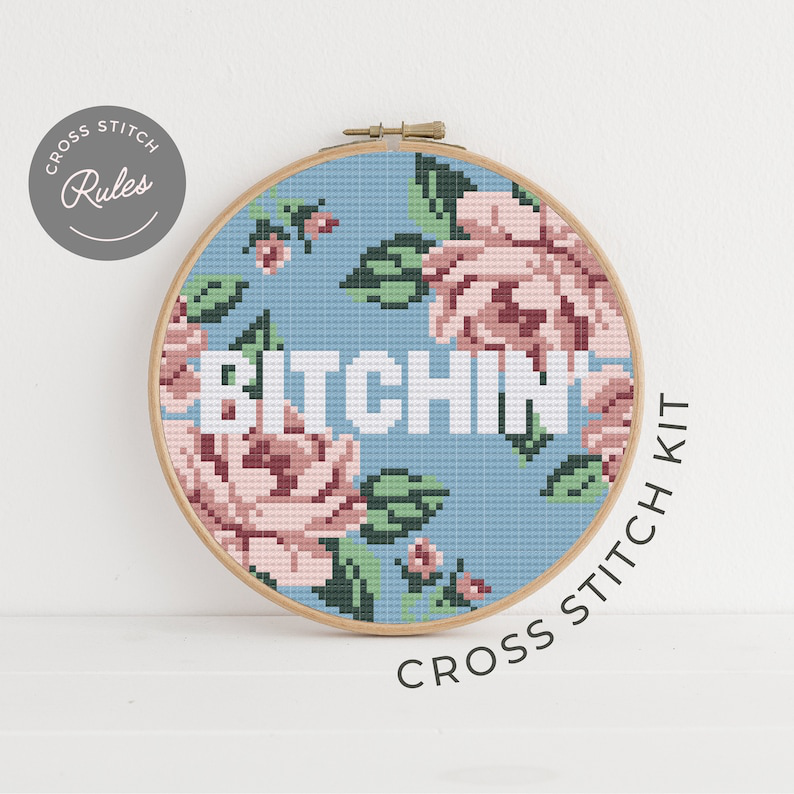

In [30]:
image

In [ ]:




# convert the image to bytes
#_, img_encoded = cv2.imencode('.jpg', image)
#image_bytes = img_encoded.tobytes()
print(image.mode)

# convert PIL image to bytes
#img_bytes = io.BytesIO()
#pil_image.save(img_bytes, format='JPEG')
#image_bytes.seek(0)

# Convert the PIL image to a base64 encoded string
buffer = io.BytesIO()
image.save(buffer, format="JPEG")
img_str = base64.b64encode(buffer.getvalue()).decode('utf-8')

# send the image to the server
payload = {"image": img_str}
response = requests.post(url, json=payload)



# Get the base64 encoded image data from the request
img_str = response.json()['processed_image']

# Convert the base64 encoded string back to a PIL image
img_data = base64.b64decode(img_str)
pil_img = Image.open(io.BytesIO(img_data))

# send the image to the server
#response = requests.post(url, files={'image': img_str})

# convert the response to a PIL image
#pil_image = Image.open(io.BytesIO(response.content))

# display the black and white image
pil_image#.show()


In [ ]:
#for checking the timeout of a request
import requests

try:
    response = requests.get('http://example.com', timeout=5)
    print(response.text)
except requests.exceptions.Timeout:
    print('The request timed out')